In [14]:
# Libraries import
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##### StandardScaler: data standardization to prevent certain characteristics from dominating others.
##### AgglomerativeClustering: to perform agglomerative hierarchical clustering (AHC).
##### silhouette_score: assesses the quality of clusters by analysing their cohesion and separation.
##### dendrogram and linkage: tools for visualising the hierarchical structure of clusters.
##### Pandas: handles tabular data.

In [15]:
# Load Data
mall_customers = pd.read_csv('Mall_Customers.csv')

# Data mining
print("Aperçu des données des clients :")
print(mall_customers.head())
print('\n')
print(mall_customers.describe())

# Data standardization
scaler = StandardScaler()  # Initializing StandardScaler
mall_scaled = scaler.fit_transform(mall_customers.iloc[:, 2:])  # Let's assume that columns 3-5 contain the relevant characteristics


Aperçu des données des clients :
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   4

##### Load data: reads a CSV file named Mall_Customers.csv into a mall_customers DataFrame.
##### Data mining :
##### - head(): displays the first 5 lines.
##### - describe(): generates descriptive statistics for each column.
##### Standardisation: columns three and above (e.g. annual income and expenditure score) are standardised.

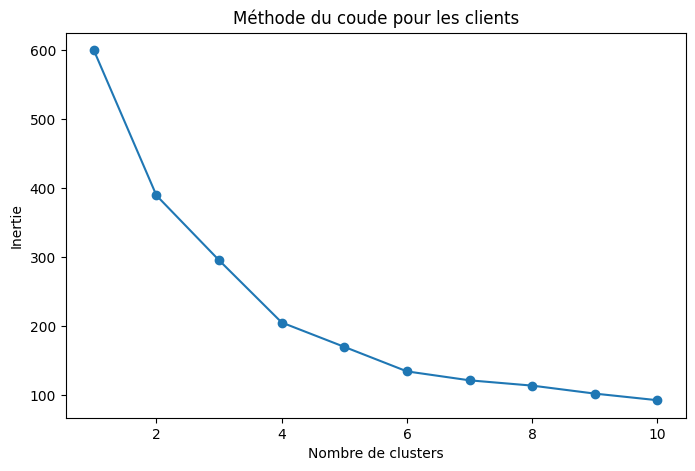

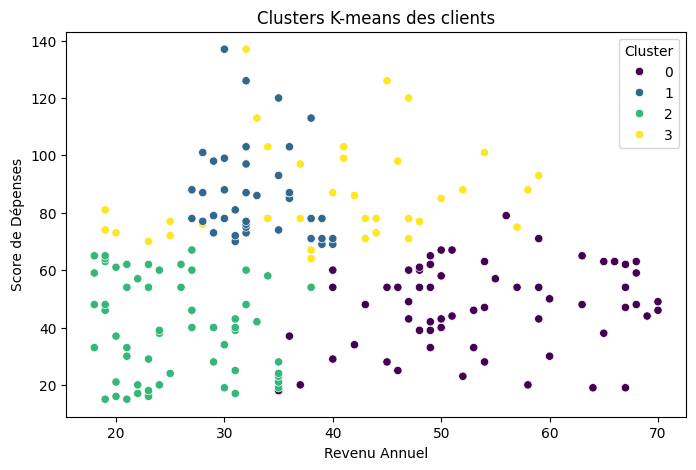

In [16]:
# Identify the optimum number of clusters (Elbow method)
k_range = range(1, 11)  # Definition of the range of values for the number of clusters
inertia = []  # List for storing inertia values

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mall_scaled)
    inertia.append(kmeans.inertia_)

# Visualisation of the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Méthode du coude pour les clients")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()

# Application of K-Means with the optimal number of clusters (for example, 4 clusters)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
mall_customers['Cluster_KMeans'] = kmeans.fit_predict(mall_scaled)

# Visualising K-means clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=mall_customers.iloc[:, 2], 
    y=mall_customers.iloc[:, 3], 
    hue=mall_customers['Cluster_KMeans'], 
    palette='viridis'
)
plt.title("Clusters K-means des clients")
plt.xlabel("Revenu Annuel")
plt.ylabel("Score de Dépenses")
plt.legend(title='Cluster')
plt.show()

##### Elbow method :
##### - Identifies the optimal number of clusters based on inertia.
##### - The elbow indicates a significant reduction in inertia.
##### Application of K-means :
##### - The optimum number of clusters is set at 4.
##### - Clusters are added to the Cluster_KMeans column.
##### Visualization: a graph showing the distribution of customers according to their annual income and spending score, coloured by cluster.

In [17]:
# Apply K-means with the optimal number of clusters
optimal_k = 4  # Let's assume 4 clusters after analysis
kmeans_mall = KMeans(n_clusters=optimal_k, random_state=42)
mall_customers['Cluster_KMeans'] = kmeans_mall.fit_predict(mall_scaled)


##### Optimal number of clusters: let's assume that the previous analysis determined that k = 4 is optimal.
##### Clustering :
##### - fit_predict: trains the model and assigns a cluster to each point.
##### Added to the dataframe: the cluster column is added to drivers_data, indicating the cluster for each driver.

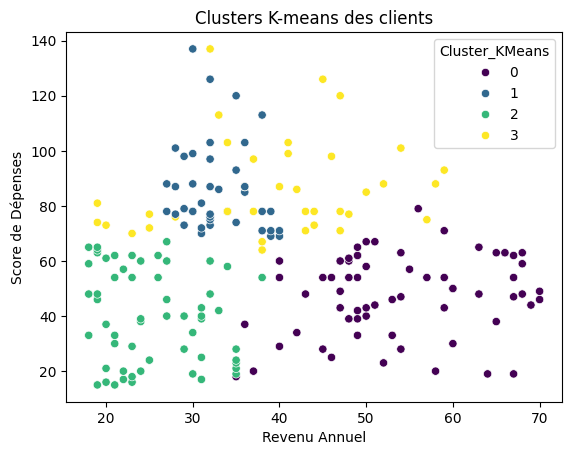

In [18]:
# Visualising K-means clusters
sns.scatterplot(
    x=mall_customers.iloc[:, 2], 
    y=mall_customers.iloc[:, 3], 
    hue=mall_customers['Cluster_KMeans'], 
    palette='viridis'
)
plt.title("Clusters K-means des clients")
plt.xlabel("Revenu Annuel")
plt.ylabel("Score de Dépenses")
plt.show()

##### Visualisation :
##### - A scatter plot shows the clusters in two dimensions.
##### - The points are coloured according to their cluster.
##### Axes: x and y represent two characteristics (assumed to be columns 2 and 3 of the dataframe).

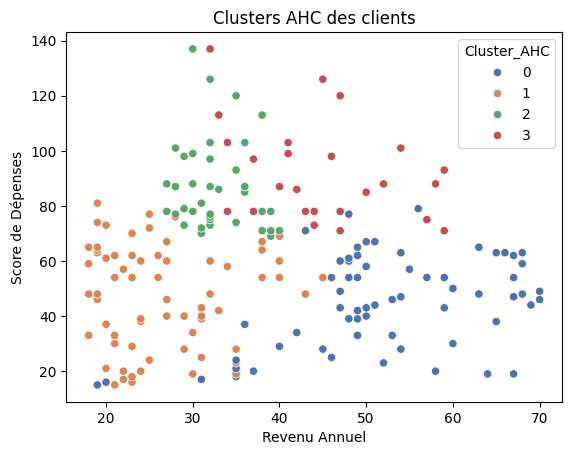

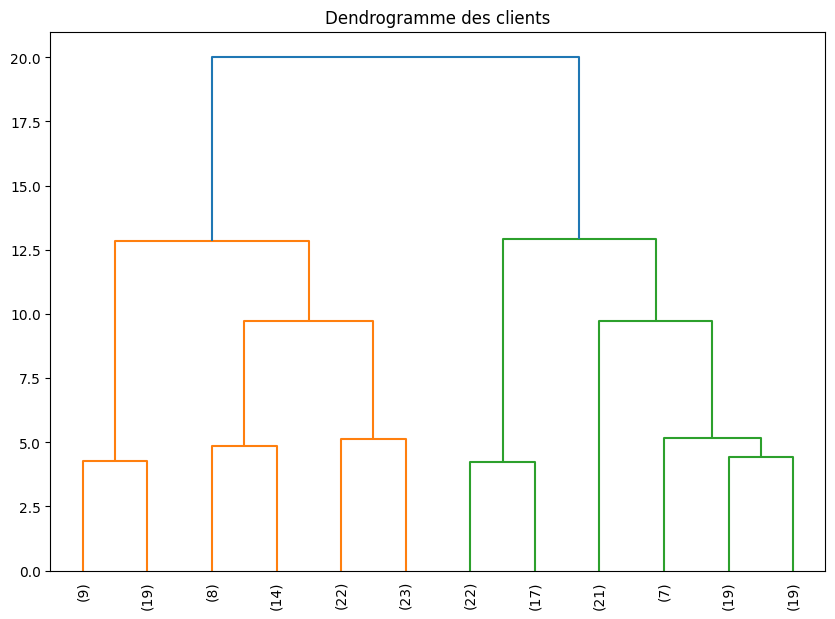

In [19]:
# Apply AHC with 4 clusters
ahc = AgglomerativeClustering(n_clusters=4, linkage='ward')
mall_customers['Cluster_AHC'] = ahc.fit_predict(mall_scaled)

# Visualisation of AHC clusters
sns.scatterplot(
    x=mall_customers.iloc[:, 2], 
    y=mall_customers.iloc[:, 3], 
    hue=mall_customers['Cluster_AHC'], 
    palette='deep'
)
plt.title("Clusters AHC des clients")
plt.xlabel("Revenu Annuel")
plt.ylabel("Score de Dépenses")
plt.show()

# Dendrogram visualisation
linked = linkage(mall_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogramme des clients")
plt.show()


##### Hierarchical clustering :
##### - Uses the Ward method to minimise intra-cluster variance.
##### - Results added to the Cluster_AHC column.
##### Visualisation: a scatter plot shows the clusters according to AHC.
##### Dendrogramme : représente la structure hiérarchique des clusters pour une analyse plus approfondie.